Part 2: ML Model

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import re
import time
import random
import tempfile
from tqdm.notebook import tqdm

import gc
gc.collect()


# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set_style("whitegrid")

# Environment settings:
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

In [2]:
# we are using cleaned Data
df_origin_train = pd.read_csv('train.csv')
df_train = df_origin_train.copy()

df_origin_test = pd.read_csv('test.csv')
df_test = df_origin_test.copy()

# Verify the load was successful
print(f"Train set loaded: {df_train.shape}")
print(f"Test set loaded: {df_test.shape}")

Train set loaded: (100000, 28)
Test set loaded: (50000, 27)


In [3]:
df_train.head(8).T

,0,1,2,3,4,5,6,7
ID,5634,5635,5636,5637,5638,5639,5640,5641
Customer_ID,3392,3392,3392,3392,3392,3392,3392,3392
Month,1,2,3,4,5,6,7,8
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000
SSN,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.120,19114.120,19114.120,19114.120,19114.120,19114.120,19114.120,19114.120
Monthly_Inhand_Salary,1824.843,1824.843,1824.843,1824.843,1824.843,1824.843,1824.843,1824.843
Num_Bank_Accounts,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  int64  
 1   Customer_ID               50000 non-null  int64  
 2   Month                     50000 non-null  int64  
 3   Name                      50000 non-null  object 
 4   Age                       50000 non-null  float64
 5   SSN                       50000 non-null  float64
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  float64
 10  Num_Credit_Card           50000 non-null  float64
 11  Interest_Rate             50000 non-null  float64
 12  Num_of_Loan               50000 non-null  float64
 13  Type_of_Loan              50000 non-null  object 
 14  Delay_

In [6]:
# Drop the Columns we not use in model
df_train.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], inplace=True)
df_test.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], inplace=True)

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.000,33.316,10.765,14.000,24.000,33.000,42.000,56.000
Annual_Income,100000.000,50505.123,38299.422,7005.930,19342.972,36999.705,71683.470,179987.280
Monthly_Inhand_Salary,100000.000,4197.271,3186.432,303.645,1626.594,3095.905,5957.715,15204.633
Num_Bank_Accounts,100000.000,5.369,2.593,0.000,3.000,5.000,7.000,11.000
Num_Credit_Card,100000.000,5.534,2.067,0.000,4.000,5.000,7.000,11.000
Interest_Rate,100000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
Num_of_Loan,100000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
Delay_from_due_date,100000.000,21.081,14.805,0.000,10.000,18.000,28.000,62.000
Num_of_Delayed_Payment,100000.000,13.313,6.237,0.000,9.000,14.000,18.000,25.000
Changed_Credit_Limit,100000.000,10.470,6.609,0.500,5.380,9.400,14.850,29.980


In [8]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.000,33.804,10.765,14.000,25.000,33.000,42.000,56.000
Annual_Income,50000.000,50505.123,38299.614,7005.930,19342.972,36999.705,71683.470,179987.280
Monthly_Inhand_Salary,50000.000,4183.034,3175.319,303.645,1623.555,3082.272,5937.530,15204.633
Num_Bank_Accounts,50000.000,5.369,2.595,0.000,3.000,5.000,7.000,11.000
Num_Credit_Card,50000.000,5.534,2.072,0.000,4.000,5.000,7.000,11.000
Interest_Rate,50000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
Num_of_Loan,50000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
Delay_from_due_date,50000.000,21.067,14.806,0.000,10.000,18.000,28.000,62.000
Num_of_Delayed_Payment,50000.000,13.315,6.238,0.000,9.000,14.000,18.000,25.000
Changed_Credit_Limit,50000.000,10.465,6.606,0.500,5.380,9.410,14.810,29.980


In [9]:
df_train.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28103
Credit_Score,100000,3,Standard,53174


In [10]:
df_test.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,50000,15,Lawyer,3548
Type_of_Loan,50000,6261,No Data,5704
Credit_Mix,50000,3,Standard,22924
Payment_of_Min_Amount,50000,3,Yes,26158
Payment_Behaviour,50000,6,Low_spent_Small_value_payments,13943


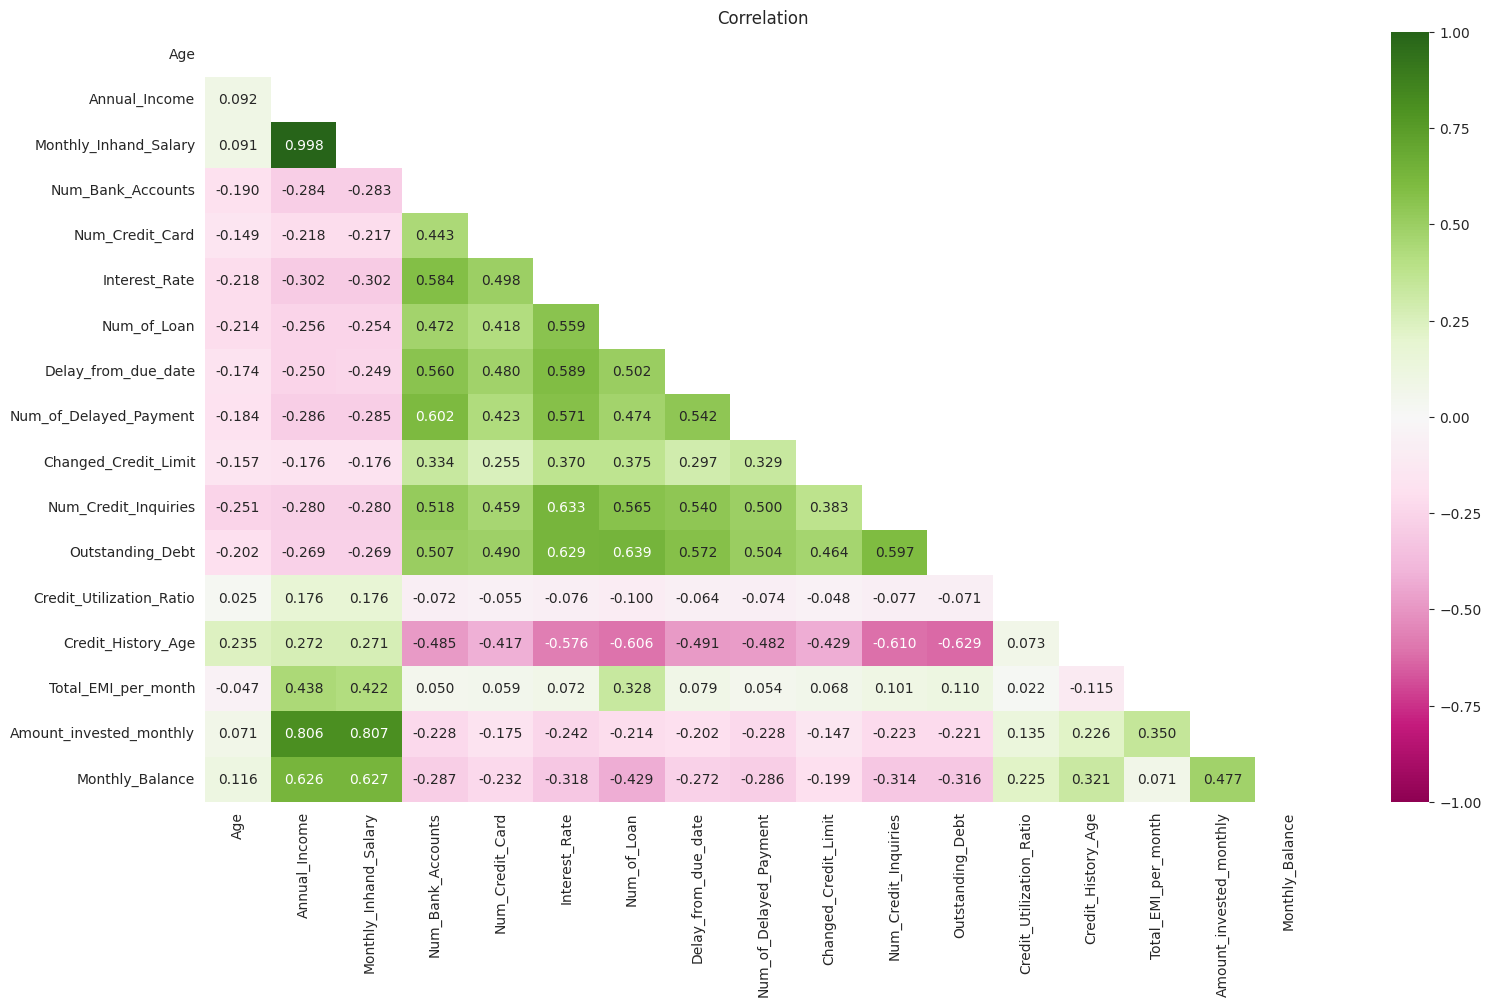

In [11]:

# 1. Set the visual style and figure size
plt.figure(figsize=(18, 10))

# 2. Calculate correlation matrix on NUMERIC columns only
corr_matrix = df_train.corr(numeric_only=True)

# 3. Create a mask to hide the top-right triangle (mirror image)
# This creates that "stepped" look from your expected image
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 4. Generate the heatmap with specific formatting
sns.heatmap(
    corr_matrix,
    mask=mask,           # Hides the top half
    annot=True,          # Shows the numbers in each box
    fmt=".3f",           # Limits decimals to match your 'f' format
    vmin=-1, vmax=1,     # Sets the scale from -1 to 1
    cmap="PiYG",         # Uses the Pink/Green color scheme from your image
    center=0
)

plt.title("Correlation")
plt.show()

03. Multi-class Classification Data Pre-Processing

In [12]:
# conda install -c anaconda scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Supervised-Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# conda install -c conda-forge xgboost
from xgboost import XGBClassifier

# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, log_loss
# Updated Supervised-Classifier-metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Replaces plot_confusion_matrix -> ConfusionMatrixDisplay.from_estimator

from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay
# Replaces plot_roc_curve -> RocCurveDisplay.from_estimator

from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay
# Replaces plot_precision_recall_curve -> PrecisionRecallDisplay.from_estimator

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# import pickle

random_state = 42

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [14]:
df_train["Credit_Score"].value_counts(normalize=True).sort_index()

,proportion
Credit_Score,
Good,0.178
Poor,0.290
Standard,0.532


In [15]:
X      = df_train.drop(columns="Credit_Score")
y      = df_train['Credit_Score']
X_test = df_test

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape,

((80000, 22), (80000,), (20000, 22), (20000,), (50000, 22))

In [16]:
from sklearn.preprocessing import LabelEncoder

le      = LabelEncoder()
print(np.unique(y_train))
y_train = le.fit_transform(y_train)
y_val   = le.transform(y_val)

pd.DataFrame(y_train).value_counts().sort_index()

['Good' 'Poor' 'Standard']


,count
0,
0,14301
1,23124
2,42575


In [17]:
# our focus group
le.inverse_transform([1])

array(['Poor'], dtype=object)

Dummy Operation

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class GetDummies(BaseEstimator, TransformerMixin):
    def __init__(self, data_sep=',', col_name_sep='_'):
        """
        Transformer that creates dummy variables from categorical columns with a separator.
        Parameters:
            - data_sep (str): Separator used to split categorical values into multiple dummy variables.
            - col_name_sep (str): Separator used to separate the column name from the prefix in the output column names.
        """
        self.data_sep     = data_sep
        self.col_name_sep = col_name_sep

    # Return self nothing else to do here
    def fit(self, X, y  = None):
        """
        Fit the transformer to the data.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - self: Returns the transformer object.
        """
        object_cols       = X.select_dtypes(include="object").columns
        self.dummy_cols   = [col for col in object_cols if X[col].str.contains(self.data_sep, regex=True).any()]
        self.dummy_prefix = [''.join(map(lambda x: x[0], col.split(self.col_name_sep)))  if self.col_name_sep in col else col[:2]   for col in self.dummy_cols]

        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            dummy_X = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))

        dummy_X.drop(columns = self.dummy_cols, inplace=True)
        self.columns = dummy_X.columns
        return self

    # Transformer method we wrote for this transformer
    def transform(self, X, y = None):
        """
        Transform the input data by creating dummy variables.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - X_transformed (pandas.DataFrame): Transformed data with dummy variables.
        """
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            X_transformed = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))

        X_transformed = X_transformed.reindex(columns=self.columns, fill_value=0)
        return X_transformed

    # to get feature names
    def get_feature_names_out(self, input_features=None):
        """
        Get the names of the transformed features.
        Parameters:
            - input_features (array-like): Names of the input features (ignored).
        Returns:
            - output_features (list): Names of the transformed features.
        """
        return self.columns.tolist()

In [19]:
# check for columns containing commas
[col for col in X_train.select_dtypes('O').columns if X_train[col].str.contains(',', regex=True).any()]

['Type_of_Loan']

In [20]:
dummy = GetDummies()

X_train_dummy = dummy.fit_transform(X_train)
X_val_dummy   = dummy.transform(X_val)

X_train_dummy.shape, X_val_dummy.shape

((80000, 31), (20000, 31))

In [21]:
X_train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 75220 to 15795
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          80000 non-null  float64
 1   Occupation                   80000 non-null  object 
 2   Annual_Income                80000 non-null  float64
 3   Monthly_Inhand_Salary        80000 non-null  float64
 4   Num_Bank_Accounts            80000 non-null  float64
 5   Num_Credit_Card              80000 non-null  float64
 6   Interest_Rate                80000 non-null  float64
 7   Num_of_Loan                  80000 non-null  float64
 8   Delay_from_due_date          80000 non-null  float64
 9   Num_of_Delayed_Payment       80000 non-null  float64
 10  Changed_Credit_Limit         80000 non-null  float64
 11  Num_Credit_Inquiries         80000 non-null  float64
 12  Credit_Mix                   80000 non-null  object 
 13  Outstanding_Debt 

OneHotEncoder and LabelEncoder
Nominal data represents categories without any inherent order or hierarchy. Each category is independent of others. One-hot encoding is commonly used for nominal data.

In [22]:
from sklearn.preprocessing import OneHotEncoder

# 1. Identify categorical columns (e.g., Occupation, Credit_Mix)
cat = X_train_dummy.select_dtypes(include="object").columns.tolist()
print('OneHotEncoder columns:', cat)

# 2. FIX: Rename 'sparse' to 'sparse_output'
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# 3. Transform and create DataFrames
X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train_dummy[cat]),
    index = X_train_dummy.index,
    columns = ohe.get_feature_names_out(cat)
)

X_val_cat = pd.DataFrame(
    ohe.transform(X_val_dummy[cat]),
    index = X_val_dummy.index,
    columns = ohe.get_feature_names_out(cat)
)

# 4. Join back with the numeric features (Age, Income, etc.)
X_train_ohe = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_val_ohe   = X_val_cat.join(X_val_dummy.select_dtypes("number"))

print(f"New Shapes: Train {X_train_ohe.shape}, Val {X_val_ohe.shape}")

OneHotEncoder columns: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
New Shapes: Train (80000, 54), Val (20000, 54)


In [23]:
X_train_ohe.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Age',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Nu

Scale data

In [24]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_ohe), columns=X_train_ohe.columns)
X_val_scaled   = pd.DataFrame(scaler.transform(X_val_ohe), columns=X_val_ohe.columns)

Define Model Evaluation Functions

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

def eval(model, X_train, X_val, y_train=y_train, y_val=y_val):
    print('TEST')
    y_val_pred = model.predict(X_val)
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))
    print("-------------------------------------------------------")
    print('TRAIN')
    y_train_pred = model.predict(X_train)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import make_scorer

# for multi-class
scoring = {
    'precision': make_scorer(precision_score, average=None, labels=[1]),
    'recall'   : make_scorer(recall_score, average=None, labels=[1]),
    'f1'       : make_scorer(f1_score, average=None, labels=[1]),
    'accuracy' : make_scorer(accuracy_score),
}
# Identify people with low credit scores
# recall_1    = make_scorer(recall_score, average = None, labels=[1])
scoring['recall']
# log_loss_neg = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

make_scorer(recall_score, response_method='predict', average=None, labels=[1])

In [27]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train),
            y = y_train)
))
class_weights

{np.int64(0): np.float64(1.8646714681956973),
 np.int64(1): np.float64(1.153203021391916),
 np.int64(2): np.float64(0.6263456645136034)}

In [28]:
from sklearn.utils import class_weight
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.unique(sample_weight)

array([0.62634566, 1.86467147, 1.15320302])

In [29]:
from collections import Counter

counter = Counter(y_train)
max_val = float(max(counter.values()))
class_weights = {class_id : max_val/count for class_id, count in counter.items()}
class_weights

{np.int64(2): 1.0,
 np.int64(0): 2.977064540941193,
 np.int64(1): 1.841160698841031}

In [30]:
pd.value_counts(y_train, normalize=True).sort_index()

/tmp/ipython-input-4125213372.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_train, normalize=True).sort_index()


,proportion
0,0.179
1,0.289
2,0.532


In [31]:
# Step 1: Compute normalized class proportions
class_proportions = pd.value_counts(y_train, normalize=True)

# Step 2: Determine maximum class proportion
max_proportion = class_proportions.max()

# Step 3: Calculate class weights
class_weights = max_proportion / class_proportions
class_weights

/tmp/ipython-input-1430505630.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_proportions = pd.value_counts(y_train, normalize=True)


,proportion
2,1.000
1,1.841
0,2.977


OrdinalEncoder
Ordinal data represents categories with a specific order or hierarchy. Ordinal encoding is suitable for ordinal data.

In [32]:
import sklearn; print(sklearn.__version__)

1.6.1


In [33]:
from sklearn.preprocessing import OrdinalEncoder

cat = X_train_dummy.select_dtypes(include="object").columns.to_list()
print('OrdinalEncoder:', cat)
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_cat = pd.DataFrame(
    enc.fit_transform(X_train_dummy[cat]), index = X_train_dummy.index,
    columns = enc.feature_names_in_
)
X_val_cat  = pd.DataFrame(
    enc.transform(X_val_dummy[cat]), index = X_val_dummy.index,
    columns = enc.feature_names_in_
)
X_train_enc = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_val_enc   = X_val_cat.join(X_val_dummy.select_dtypes("number"))

X_train_enc.shape, X_val_enc.shape

OrdinalEncoder: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


((80000, 31), (20000, 31))

In [34]:
X_train_enc.columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'ToL_No Data', 'ToL_auto loan',
       'ToL_credit-builder loan', 'ToL_debt consolidation loan',
       'ToL_home equity loan', 'ToL_mortgage loan', 'ToL_not specified',
       'ToL_payday loan', 'ToL_personal loan', 'ToL_student loan'],
      dtype='object')

Implement XGBoost Classifier Model (Xgboost with Scikit-learn API)

In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=random_state,
)

In [36]:
%%time
xgb.fit(X_train_enc, y_train,
    sample_weight=sample_weight
)
# weight parameter in XGBoost is per instance not per class.

CPU times: user 8.91 s, sys: 27.7 ms, total: 8.94 s
Wall time: 5.58 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [37]:
print("XGB MODEL")
eval(xgb, X_train_enc, X_val_enc)

XGB MODEL
TEST
[[3056   40  431]
 [ 361 4905  608]
 [1639 1644 7316]]
              precision    recall  f1-score   support

           0       0.60      0.87      0.71      3527
           1       0.74      0.84      0.79      5874
           2       0.88      0.69      0.77     10599

    accuracy                           0.76     20000
   macro avg       0.74      0.80      0.76     20000
weighted avg       0.79      0.76      0.77     20000

-------------------------------------------------------
TRAIN
[[13233    65  1003]
 [  911 20583  1630]
 [ 6003  5879 30693]]
              precision    recall  f1-score   support

           0       0.66      0.93      0.77     14301
           1       0.78      0.89      0.83     23124
           2       0.92      0.72      0.81     42575

    accuracy                           0.81     80000
   macro avg       0.78      0.85      0.80     80000
weighted avg       0.83      0.81      0.81     80000



With Best Parameters (GridsearchCV)

In [38]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    random_state=random_state
)
param_grid = {
    'n_estimators' : [100],
    'learning_rate': np.linspace(0.01, 0.3, 2).round(3),
    'max_depth'    : [5, 6],
#     'reg_alpha'    : [0, 0.5, 1],
#     'reg_lambda'   : [0, 0.5, 1],
}
grid_model_xgb = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = scoring['recall'], # 'neg_log_loss'
    error_score='raise',
    n_jobs = -1,
#     refit=True,
    cv=5,
)

In [39]:
%%time
grid_model_xgb.fit(X_train_enc, y_train,
    sample_weight=sample_weight
)

CPU times: user 7.74 s, sys: 125 ms, total: 7.86 s
Wall time: 1min 16s


GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interac...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.3 ]),
                         'max_depth': [5, 6], 'n_estimators': [100]},
             scoring=make_scorer(recall_score, response_method='predict', average=None, labels=[1]))

In [40]:
# Get the best hyperparameters
best_params_xgb = grid_model_xgb.best_params_

best_params_xgb, grid_model_xgb.best_score_

({'learning_rate': np.float64(0.3), 'max_depth': 6, 'n_estimators': 100},
 np.float64(0.8355391096979332))

In [41]:
print("GRID XGB MODEL BALANCED")
eval(grid_model_xgb, X_train_enc, X_val_enc)

GRID XGB MODEL BALANCED
TEST
[[3056   40  431]
 [ 361 4905  608]
 [1639 1644 7316]]
              precision    recall  f1-score   support

           0       0.60      0.87      0.71      3527
           1       0.74      0.84      0.79      5874
           2       0.88      0.69      0.77     10599

    accuracy                           0.76     20000
   macro avg       0.74      0.80      0.76     20000
weighted avg       0.79      0.76      0.77     20000

-------------------------------------------------------
TRAIN
[[13233    65  1003]
 [  911 20583  1630]
 [ 6003  5879 30693]]
              precision    recall  f1-score   support

           0       0.66      0.93      0.77     14301
           1       0.78      0.89      0.83     23124
           2       0.92      0.72      0.81     42575

    accuracy                           0.81     80000
   macro avg       0.78      0.85      0.80     80000
weighted avg       0.83      0.81      0.81     80000



In [42]:
import matplotlib.pyplot as plt
plt.close('all')


04. Future Importance XGBoost

In [43]:
# xgb_model has best scorer default parameters
X_val_enc.columns.shape, xgb.feature_importances_.shape


((31,), (31,))

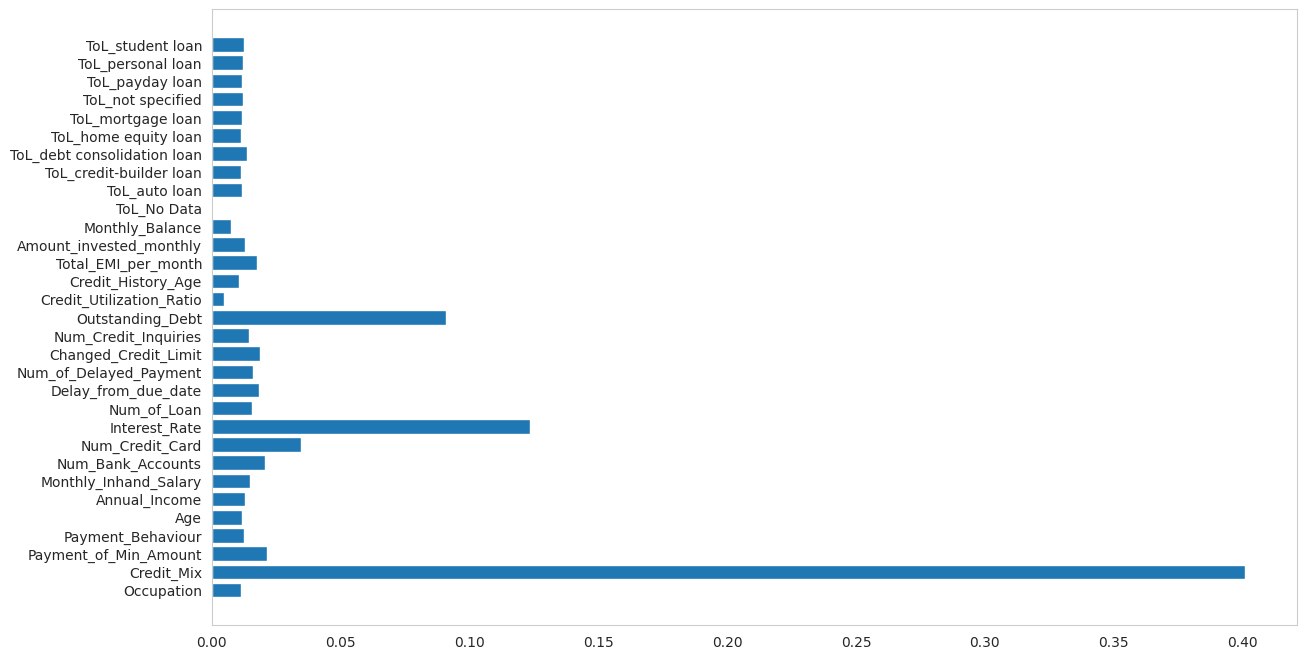

In [44]:
plt.figure(figsize=(14,8))
plt.barh(X_val_enc.columns, xgb.feature_importances_);

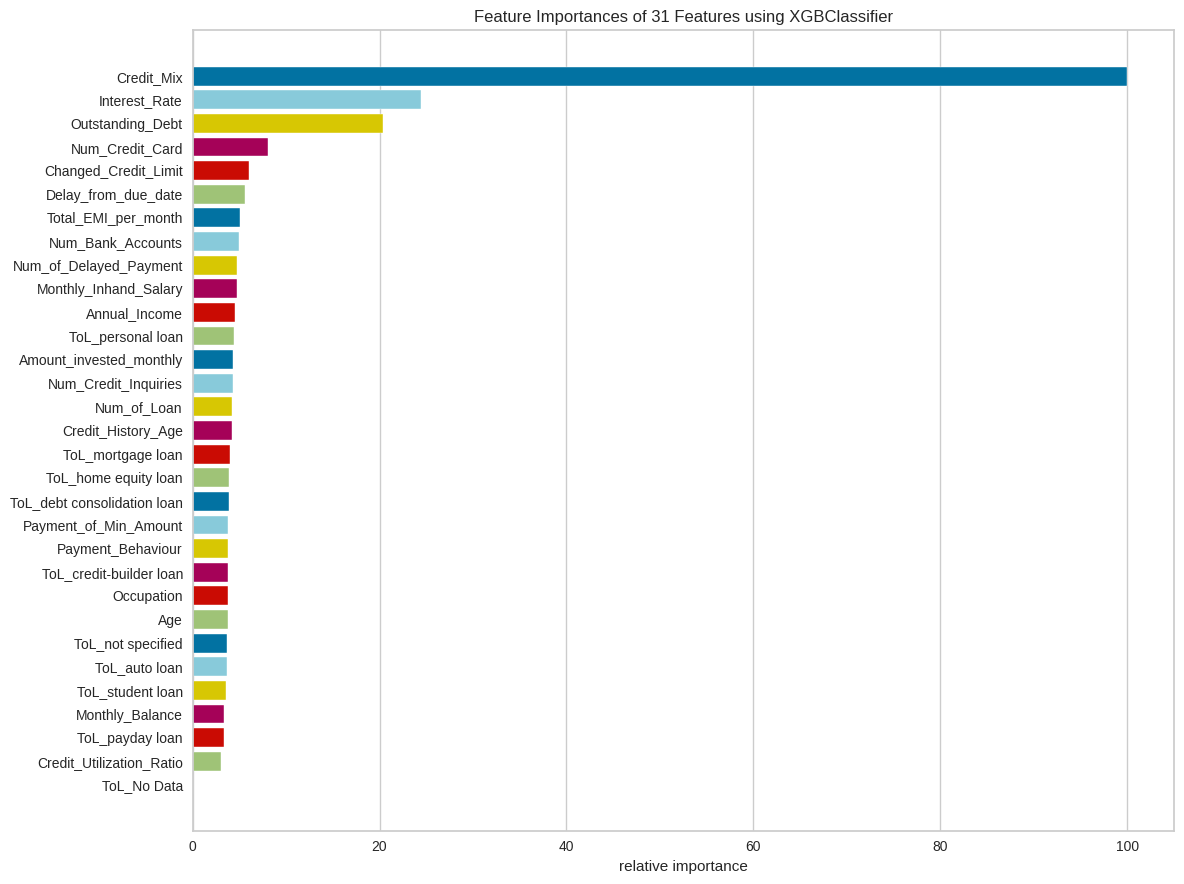

In [45]:
from yellowbrick.model_selection import feature_importances, FeatureImportances

model = XGBClassifier(
    random_state=random_state,
    **best_params_xgb
)

plt.subplots(figsize=(12, 9))
# Use the quick method and immediately show the figure
feature_importances(model, X_val_enc, y_val);

Final Model

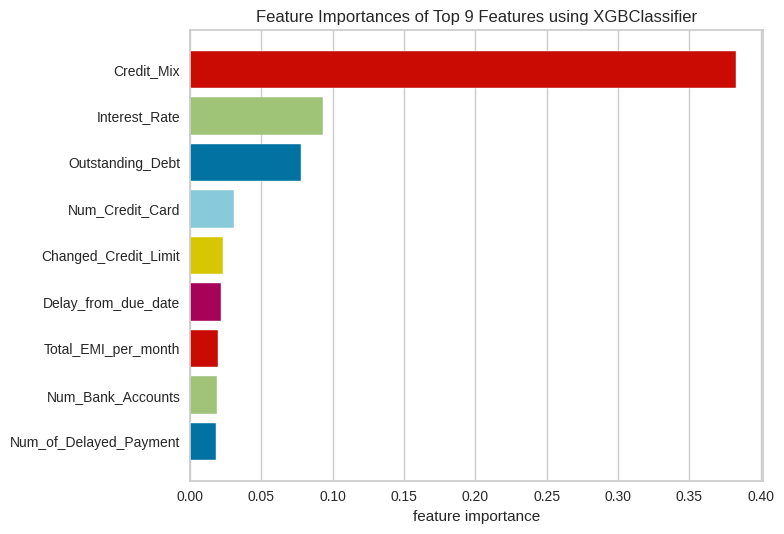

['Num_of_Delayed_Payment' 'Num_Bank_Accounts' 'Total_EMI_per_month'
 'Delay_from_due_date' 'Changed_Credit_Limit' 'Num_Credit_Card'
 'Outstanding_Debt' 'Interest_Rate' 'Credit_Mix']


In [46]:
model = XGBClassifier(
    random_state=random_state,
    **best_params_xgb
)
# seect top 8 features
viz = feature_importances(model, X_val_enc, y_val, relative=False, topn=9)

# get top 8 features
print(viz.features_)

In [47]:
# selected 9 features for final model
df_final = df_train[viz.features_.tolist() + ['Credit_Score']]
df_final

,Num_of_Delayed_Payment,Num_Bank_Accounts,Total_EMI_per_month,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix,Credit_Score
0,7.000,3.000,49.575,3.000,11.270,4.000,809.980,3.000,Good,Good
1,4.000,3.000,49.575,3.000,11.270,4.000,809.980,3.000,Good,Good
2,7.000,3.000,49.575,3.000,11.270,4.000,809.980,3.000,Good,Good
3,4.000,3.000,49.575,5.000,6.270,4.000,809.980,3.000,Good,Good
4,4.000,3.000,49.575,6.000,11.270,4.000,809.980,3.000,Good,Good
...,...,...,...,...,...,...,...,...,...,...
99995,7.000,4.000,35.104,23.000,11.500,6.000,502.380,7.000,Good,Poor
99996,7.000,4.000,35.104,18.000,11.500,6.000,502.380,7.000,Good,Poor
99997,6.000,4.000,35.104,27.000,11.500,6.000,502.380,7.000,Good,Poor
99998,6.000,4.000,35.104,20.000,11.500,6.000,502.380,7.000,Good,Standard


In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Num_of_Delayed_Payment  100000 non-null  float64
 1   Num_Bank_Accounts       100000 non-null  float64
 2   Total_EMI_per_month     100000 non-null  float64
 3   Delay_from_due_date     100000 non-null  float64
 4   Changed_Credit_Limit    100000 non-null  float64
 5   Num_Credit_Card         100000 non-null  float64
 6   Outstanding_Debt        100000 non-null  float64
 7   Interest_Rate           100000 non-null  float64
 8   Credit_Mix              100000 non-null  object 
 9   Credit_Score            100000 non-null  object 
dtypes: float64(8), object(2)
memory usage: 7.6+ MB


In [49]:
X = df_final.drop(columns='Credit_Score')
y = df_final['Credit_Score']

In [50]:
cat = X.select_dtypes(include="object").columns.to_list()
print('OrdinalEncoder:', cat)
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_enc      = X.copy()
X_enc[cat] = enc.fit_transform(X_enc[cat])

X_enc.shape

OrdinalEncoder: ['Credit_Mix']


(100000, 9)

In [51]:
le = LabelEncoder()
y  = le.fit_transform(y)

In [52]:
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y)
sample_weight

array([1.86971805, 1.86971805, 1.86971805, ..., 1.14950456, 0.62687278,
       1.14950456])

In [53]:
final_model = XGBClassifier(
    random_state=random_state,
    **best_params_xgb
)

In [54]:
%%time
final_model.fit(X_enc, y,
    sample_weight=sample_weight
)

CPU times: user 4.25 s, sys: 17.4 ms, total: 4.27 s
Wall time: 2.2 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.3), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.61      0.89      0.72     17828
           1       0.75      0.85      0.79     28998
           2       0.89      0.68      0.77     53174

    accuracy                           0.77    100000
   macro avg       0.75      0.81      0.76    100000
weighted avg       0.80      0.77      0.77    100000



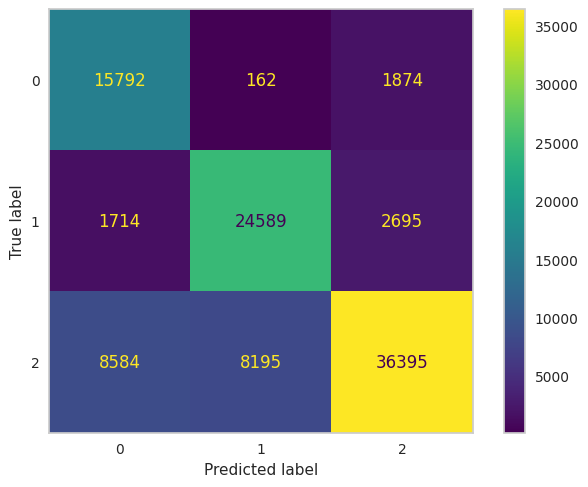

In [55]:
sns.set_style("whitegrid", {'axes.grid' : False})
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = final_model.predict(X_enc)

print(classification_report(y, y_pred))
ConfusionMatrixDisplay.from_estimator(final_model, X_enc, y);

In [56]:
np.bincount(y_pred)

array([26090, 32946, 40964])

In [57]:
X.head()

,Num_of_Delayed_Payment,Num_Bank_Accounts,Total_EMI_per_month,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix
0,7.000,3.000,49.575,3.000,11.270,4.000,809.980,3.000,Good
1,4.000,3.000,49.575,3.000,11.270,4.000,809.980,3.000,Good
2,7.000,3.000,49.575,3.000,11.270,4.000,809.980,3.000,Good
3,4.000,3.000,49.575,5.000,6.270,4.000,809.980,3.000,Good
4,4.000,3.000,49.575,6.000,11.270,4.000,809.980,3.000,Good


In [58]:
X.describe()

,Num_of_Delayed_Payment,Num_Bank_Accounts,Total_EMI_per_month,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,13.313,5.369,107.699,21.081,10.470,5.534,1426.220,14.532
std,6.237,2.593,132.267,14.805,6.609,2.067,1155.129,8.741
min,0.000,0.000,0.000,0.000,0.500,0.000,0.230,1.000
25%,9.000,3.000,29.269,10.000,5.380,4.000,566.072,7.000
50%,14.000,5.000,66.462,18.000,9.400,5.000,1166.155,13.000
75%,18.000,7.000,147.393,28.000,14.850,7.000,1945.963,20.000
max,25.000,11.000,1779.103,62.000,29.980,11.000,4998.070,34.000


In [59]:
X.describe(include='O')

,Credit_Mix
count,100000
unique,3
top,Standard
freq,45848


In [60]:
mean_human = pd.concat([X.select_dtypes('number').mean().astype(int).to_frame().T, X.select_dtypes('object').mode()], axis=1)
mean_human.to_dict()

{'Num_of_Delayed_Payment': {0: 13},
 'Num_Bank_Accounts': {0: 5},
 'Total_EMI_per_month': {0: 107},
 'Delay_from_due_date': {0: 21},
 'Changed_Credit_Limit': {0: 10},
 'Num_Credit_Card': {0: 5},
 'Outstanding_Debt': {0: 1426},
 'Interest_Rate': {0: 14},
 'Credit_Mix': {0: 'Standard'}}

In [61]:
mean_human[cat] = enc.transform(mean_human[cat])
mean_human

,Num_of_Delayed_Payment,Num_Bank_Accounts,Total_EMI_per_month,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix
0,13,5,107,21,10,5,1426,14,2.000


In [62]:
predict = final_model.predict(mean_human)
predict, le.inverse_transform(predict)

(array([2]), array(['Standard'], dtype=object))

Predict Test Data

In [63]:
X_test_enc      = X_test[df_final.columns[:-1]].copy()
X_test_enc[cat] = enc.fit_transform(X_test_enc[cat])

X_test_enc.shape

(50000, 9)

In [64]:
y_test_pred = final_model.predict(X_test_enc)
pd.value_counts(y_test_pred).sort_index()

/tmp/ipython-input-3455180168.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_test_pred).sort_index()


,count
0,13518
1,16285
2,20197


In [65]:
np.bincount(y_test_pred)

array([13518, 16285, 20197])

Prepare Model Deployment

In [66]:
%%writefile get_dummies.py

# Save your custom function in a Python script (.py file) and then import it to use it with pickle.load().
# This is a common approach to store and reuse custom functions in different scripts or projects.
from sklearn.base import BaseEstimator, TransformerMixin

class GetDummies(BaseEstimator, TransformerMixin):
    def __init__(self, data_sep=',', col_name_sep='_'):
        """
        Transformer that creates dummy variables from categorical columns with a separator.
        Parameters:
            - data_sep (str): Separator used to split categorical values into multiple dummy variables.
            - col_name_sep (str): Separator used to separate the column name from the prefix in the output column names.
        """
        self.data_sep     = data_sep
        self.col_name_sep = col_name_sep

    # Return self nothing else to do here
    def fit(self, X, y  = None):
        """
        Fit the transformer to the data.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - self: Returns the transformer object.
        """
        object_cols       = X.select_dtypes(include="object").columns
        self.dummy_cols   = [col for col in object_cols if X[col].str.contains(self.data_sep, regex=True).any()]
        self.dummy_prefix = [''.join(map(lambda x: x[0], col.split(self.col_name_sep)))  if self.col_name_sep in col else col[:2]   for col in self.dummy_cols]

        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            dummy_X = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))

        dummy_X.drop(columns = self.dummy_cols, inplace=True)
        self.columns = dummy_X.columns
        return self

    # Transformer method we wrote for this transformer
    def transform(self, X, y = None):
        """
        Transform the input data by creating dummy variables.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - X_transformed (pandas.DataFrame): Transformed data with dummy variables.
        """
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            X_transformed = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))

        X_transformed = X_transformed.reindex(columns=self.columns, fill_value=0)
        return X_transformed

    # to get feature names
    def get_feature_names_out(self, input_features=None):
        """
        Get the names of the transformed features.
        Parameters:
            - input_features (array-like): Names of the input features (ignored).
        Returns:
            - output_features (list): Names of the transformed features.
        """
        return self.columns.tolist()

Writing get_dummies.py


In [67]:
from get_dummies import GetDummies

In [68]:
dummy = GetDummies()
dummy.fit(X_train)
dummy.__class__.__module__



'get_dummies'

In [69]:
print(dummy.__class__)
print(dummy.__class__.__module__)

<class 'get_dummies.GetDummies'>
get_dummies


In [70]:
import pickle
pickle.dump(enc,   open("credit_score_multi_class_ord_encoder.pkl", 'wb'))
pickle.dump(le,    open("credit_score_multi_class_le.pkl", 'wb'))
pickle.dump(dummy, open("credit_score_multi_class_dummy.pkl", 'wb'))

save xgboost

In [71]:
# Save the model for XGBoost
final_model.save_model('credit_score_multi_class_xgboost_model.json')

CHECK ONLY

In [72]:
# sanity check
import pandas as pd
from xgboost import XGBClassifier
import pickle

import sys
# Replace with the actual path to 'get_dummies.py'
sys.path.append('/kaggle/input/creditscoreclassification/')
# Now you can import the custom module and use its functions
from get_dummies import GetDummies

# Load the encoder from the file
loaded_enc   = pickle.load(open("credit_score_multi_class_ord_encoder.pkl", "rb"))
loaded_le    = pickle.load(open("credit_score_multi_class_le.pkl", "rb"))
loaded_dummy = pickle.load(open("credit_score_multi_class_dummy.pkl", "rb"))

# Load the model from the file
loaded_model = XGBClassifier()
loaded_model.load_model("credit_score_multi_class_xgboost_model.json")
loaded_model

XGBClassifier(base_score=[0.3333015, 0.33344305, 0.33335513], booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              feature_types=['float', 'float', 'float', 'float', 'float',
                             'float', 'float', 'float', 'float'],
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [73]:
from IPython.display import FileLink, FileLinks
ord_enc   = FileLink(r'credit_score_multi_class_ord_encoder.pkl', result_html_prefix="Click here to download: ")
l_enc     = FileLink(r'credit_score_multi_class_le.pkl', result_html_prefix="Click here to download: ")
dummy_enc = FileLink(r'credit_score_multi_class_dummy.pkl', result_html_prefix="Click here to download: ")
model     = FileLink(r'credit_score_multi_class_xgboost_model.json', result_html_prefix="Click here to download: ")

display(ord_enc, l_enc, dummy_enc, model)

/content/credit_score_multi_class_ord_encoder.pkl

/content/credit_score_multi_class_le.pkl

/content/credit_score_multi_class_dummy.pkl

/content/credit_score_multi_class_xgboost_model.json

# SHAP

In [86]:
print(loaded_le.classes_)

['Good' 'Poor' 'Standard']


In [87]:
model_features = final_model.get_booster().feature_names
X_shap_correct = X[model_features].copy()


In [88]:
X_shap_correct['Credit_Mix'] = (
    X_shap_correct['Credit_Mix']
    .astype(str)
    .str.strip()
    .str.title()   # ensures Poor / Good / Standard
)


In [89]:
X_shap_correct[['Credit_Mix']] = loaded_enc.transform(
    X_shap_correct[['Credit_Mix']]
)


In [90]:
print(X_shap_correct.dtypes)
print(X_shap_correct['Credit_Mix'].unique())
print(X_shap_correct['Credit_Mix'].value_counts())
print(X_shap_correct['Credit_Mix'].dtype)


Num_of_Delayed_Payment    float64
Num_Bank_Accounts         float64
Total_EMI_per_month       float64
Delay_from_due_date       float64
Changed_Credit_Limit      float64
Num_Credit_Card           float64
Outstanding_Debt          float64
Interest_Rate             float64
Credit_Mix                float64
dtype: object
[1. 2. 0.]
Credit_Mix
2.000    45848
1.000    30384
0.000    23768
Name: count, dtype: int64
float64


Model features: ['Num_of_Delayed_Payment', 'Num_Bank_Accounts', 'Total_EMI_per_month', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Card', 'Outstanding_Debt', 'Interest_Rate', 'Credit_Mix']


100%|===================| 896/900 [00:17<00:00]       

Classes: ['Good' 'Poor' 'Standard']


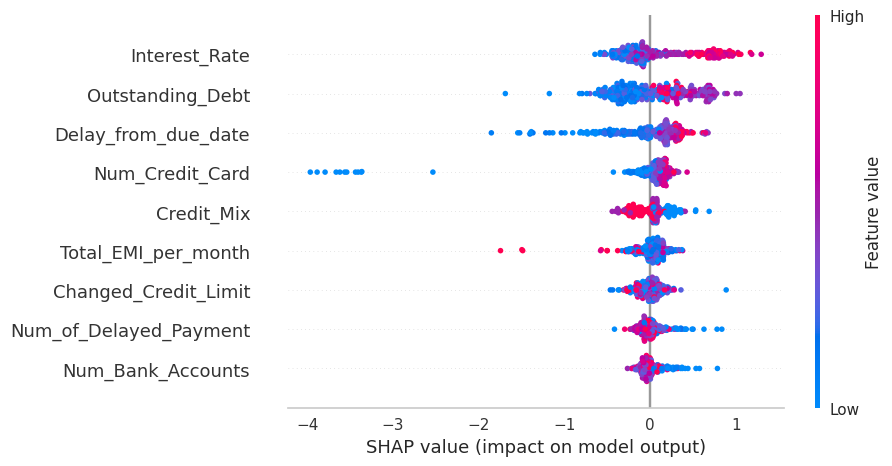

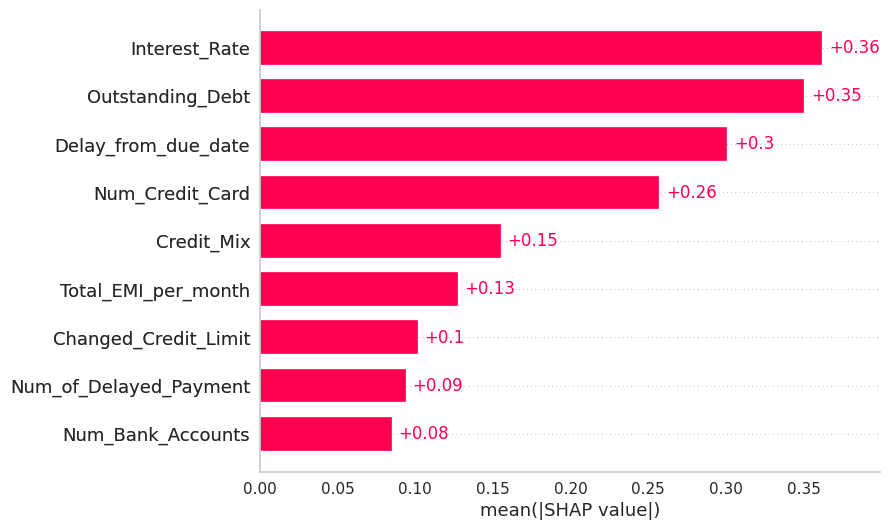

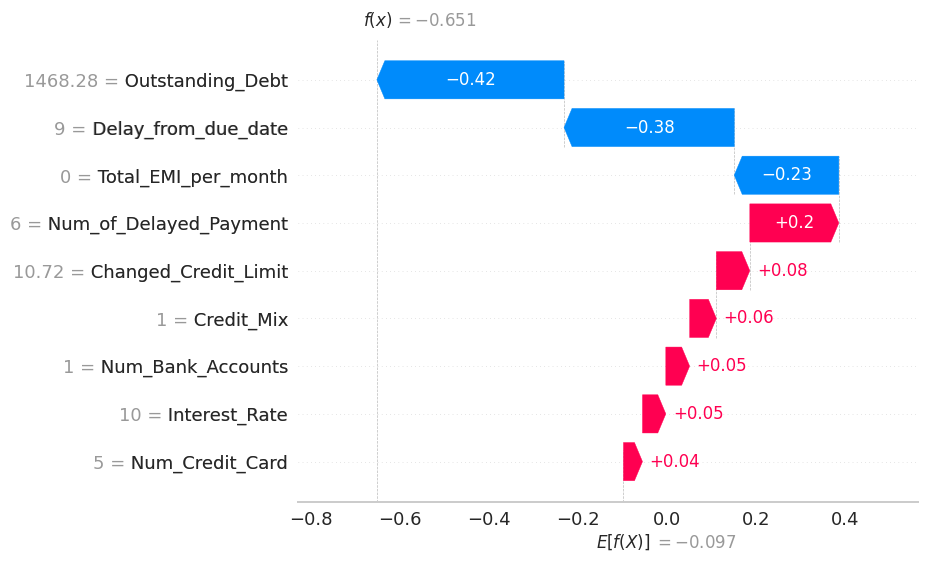

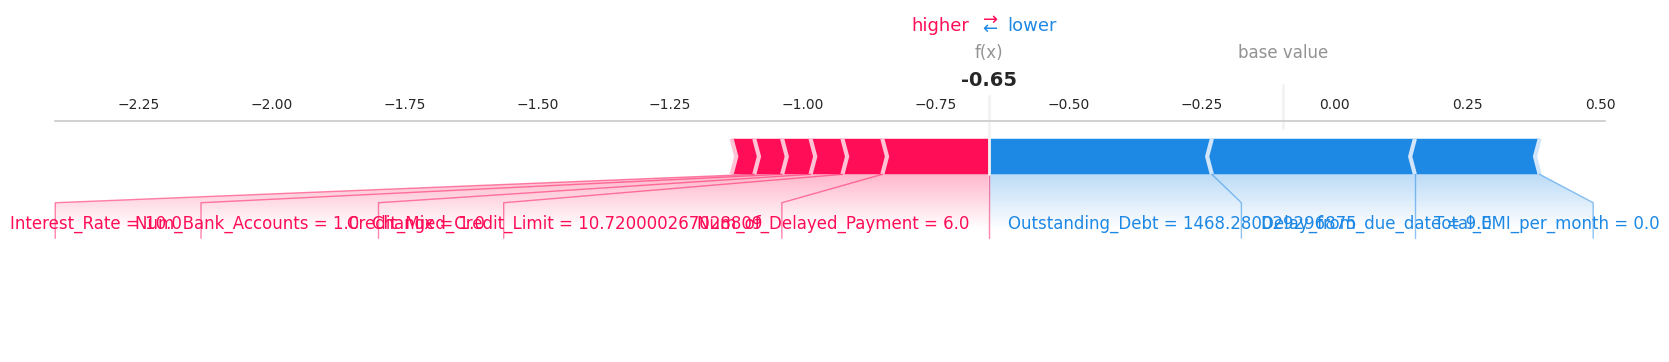

In [91]:
# ============================================
# SHAP EXPLAINABILITY FOR XGBOOST (FINAL, FIXED)
# ============================================

import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------
# 1. MODEL (SKLEARN API — IMPORTANT)
# ------------------------------------------------
model = final_model   # XGBClassifier (NOT booster)

# ------------------------------------------------
# 2. GET MODEL FEATURES (ORDER MATTERS)
# ------------------------------------------------
model_features = model.get_booster().feature_names
print("Model features:", model_features)

# ------------------------------------------------
# 3. PREPARE SHAP INPUT (MATCH TRAINING PIPELINE)
# ------------------------------------------------
X_shap_correct = X[model_features].copy()

# Encode Credit_Mix using the SAME encoder
X_shap_correct[['Credit_Mix']] = loaded_enc.transform(
    X_shap_correct[['Credit_Mix']]
)

# Ensure numeric
X_shap_correct = X_shap_correct.astype(np.float32)

# Sample for speed
X_shap = X_shap_correct.sample(200, random_state=42)

# ------------------------------------------------
# 4. CREATE SHAP EXPLAINER (SAFE & STABLE)
# ------------------------------------------------
explainer = shap.Explainer(
    model,
    X_shap_correct,      # background dataset
    algorithm="tree"
)

# ------------------------------------------------
# 5. COMPUTE SHAP VALUES
# ------------------------------------------------
shap_values = explainer(X_shap)

# ------------------------------------------------
# 6. SELECT CLASS TO EXPLAIN
# ------------------------------------------------
class_names = loaded_le.classes_
print("Classes:", class_names)

class_name = "Poor"   # change  either Poor, Good, Standard
class_idx = list(class_names).index(class_name)

shap_values_class = shap_values[..., class_idx]

# =================================================
# GLOBAL EXPLANATION
# =================================================

# 1️⃣ Global feature impact (distribution + direction)
shap.plots.beeswarm(
    shap_values_class,
    max_display=10
)

# 2️⃣ Global feature importance (ranking)
shap.plots.bar(
    shap_values_class,
    max_display=10
)

# =================================================
# LOCAL EXPLANATION
# =================================================

# Pick one instance
i = 0

# Waterfall plot (exact f(x))
shap.plots.waterfall(
    shap_values_class[i],
    max_display=10
)

# =================================================
# OPTIONAL: FORCE PLOT
# =================================================

shap.force_plot(
    explainer.expected_value[class_idx],
    shap_values_class[i].values,
    X_shap.iloc[i],
    matplotlib=True
)


# Counterfactual Explanation

In [92]:
!pip install dice-ml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 6.9 MB/s eta 0:00:00


In [93]:
import dice_ml
import pandas as pd
import numpy as np
# -------------------------------
# 1. Prepare feature data
# -------------------------------

model_features = final_model.get_booster().feature_names

X_cf = X[model_features].copy()

# Encode Credit_Mix (same as training)
X_cf[['Credit_Mix']] = loaded_enc.transform(
    X_cf[['Credit_Mix']]
)

X_cf = X_cf.astype(np.float32)




Prepare target column (decoded labels)

In [94]:
# Target in original string labels
y_cf = loaded_le.inverse_transform(
    final_model.predict(X_cf)
)

data_cf = X_cf.copy()
data_cf['Credit_Score'] = y_cf


Create DiCE Data & Model objects

In [95]:
from dice_ml import Dice
from dice_ml.utils import helpers
# -------------------------------
# DiCE Data object
# -------------------------------

dice_data = dice_ml.Data(
    dataframe=data_cf,
    continuous_features=[
        'Num_of_Delayed_Payment',
        'Num_Bank_Accounts',
        'Total_EMI_per_month',
        'Delay_from_due_date',
        'Changed_Credit_Limit',
        'Num_Credit_Card',
        'Outstanding_Debt',
        'Interest_Rate'
    ],
    outcome_name='Credit_Score'
)
# -------------------------------
# DiCE Model object
# -------------------------------

dice_model = dice_ml.Model(
    model=final_model,
    backend="sklearn",
    model_type="classifier"
)


Create the Counterfactual Explainer

In [96]:
dice_exp = Dice(
    dice_data,
    dice_model,
    method="random"   # stable & fast
)


In [98]:
# Get predictions for all rows
pred_labels = loaded_le.inverse_transform(
    final_model.predict(X_cf)
)

# Convert to Series for easy filtering
pred_series = pd.Series(pred_labels)

# Find Poor cases
poor_indices = pred_series[pred_series == "Poor"].index

print("Number of Poor cases:", len(poor_indices))


Number of Poor cases: 32946


In [99]:
# Pick the first Poor case
idx = poor_indices[0]

query_instance = X_cf.iloc[[idx]]

print(
    "Current prediction:",
    loaded_le.inverse_transform(
        final_model.predict(query_instance)
    )
)


Current prediction: ['Poor']


In [100]:
features_to_vary = [
    'Num_of_Delayed_Payment',
    'Delay_from_due_date',
    'Interest_Rate',
    'Outstanding_Debt',
    'Total_EMI_per_month'
]


Generate counterfactuals

In [102]:
print(list(enumerate(loaded_le.classes_)))


[(0, 'Good'), (1, 'Poor'), (2, 'Standard')]


In [103]:
cf = dice_exp.generate_counterfactuals(
    query_instance,
    total_CFs=3,
    desired_class=0,      # Good
    features_to_vary=features_to_vary
)


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '43.6' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/usr/local/lib/python3.12/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '18.3' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/usr/local/lib/python3.12/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype i

In [104]:
cf.visualize_as_dataframe()


Query instance (original outcome : 1)


,Num_of_Delayed_Payment,Num_Bank_Accounts,Total_EMI_per_month,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix,Credit_Score
0,11.000,8.000,70.478,30.000,17.130,7.000,1704.180,15.000,2.000,1



Diverse Counterfactual set (new outcome: 0)


,Num_of_Delayed_Payment,Num_Bank_Accounts,Total_EMI_per_month,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix,Credit_Score
0,5.200,8.000,1111.500,30.000,17.130,7.000,1704.180,15.000,2.000,0
1,11.000,8.000,769.400,30.000,17.130,7.000,1704.180,15.000,2.000,0
2,11.000,8.000,1160.900,30.000,17.130,7.000,1704.180,8.400,2.000,0


In [106]:
original = cf.cf_examples_list[0].test_instance_df.iloc[0]
cf_example = cf.cf_examples_list[0].final_cfs_df.iloc[0]

print("🔍 COUNTERFACTUAL EXPLANATION (Plain English)\n")

for feature in original.index:
    if original[feature] != cf_example[feature]:
        print(
            f"- Change {feature} from {original[feature]:.2f} "
            f"to {cf_example[feature]:.2f}"
        )

print("\n➡ This would change the prediction from POOR to GOOD.")


🔍 COUNTERFACTUAL EXPLANATION (Plain English)

- Change Num_of_Delayed_Payment from 11.00 to 5.20
- Change Total_EMI_per_month from 70.48 to 1111.50
- Change Credit_Score from 1.00 to 0.00

➡ This would change the prediction from POOR to GOOD.


# End of Model Training, Next is Streamlit (Running on Local PC)

Ready to run Streamlit local